# COMP4318 & 5318 - Machine Learning and Data Mining: Assignment 1

Due: Sunday Week 7 - Sep 15th, 2024 11:59PM

## 3.1 Loading data

Use the following Python code to load the training data:  

In [1]:
import pandas as pd
import os
print(os.listdir("./data"))
pd.set_option('display.max_columns', 10)

['sample.csv', 'test2.csv', 'test1.csv', 'train.csv']


/var/folders/52/s88k1w256td5y_qc9x86093r0000gn/T/ipykernel_17845/4148052575.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


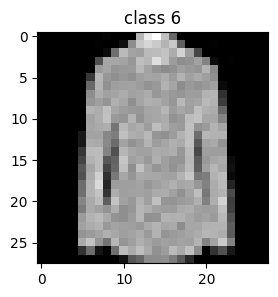

In [5]:
import matplotlib.pyplot as plt
data_train_feature = data_train_feature.reshape((data_train_feature.shape[0], 28, 28))
plt.figure(figsize=(3,3))
plt.imshow(data_train_feature[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(data_train_label[0]))
plt.show()

# 4. Task Description

## 4.1 Code

### 4.1.1 Environment Setup

Install and import necessary packages and libraries used in your coding environment. It is recommended to specify their versions to ensure reproducibility.

In [31]:
# Environment Setup

## General:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing/processing
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler # Scale data to [0, 1]

## Implementing PCA
from sklearn.decomposition import PCA

## Implementing kNN
from sklearn.neighbors import KNeighborsClassifier

## implementing SVM
from sklearn.svm import SVC

## Evaluation
from sklearn.metrics import f1_score, mean_absolute_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
# Read file
pd.options.mode.chained_assignment = None
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test1.csv')
df_test_kaggle = pd.read_csv('data/test2.csv')

#set seed
seed = 5318

# Data Preprocessing

## Formatting test and training data
X_train = df_train.loc[:, "v1":"v784"]
Y_train = df_train.loc[:, "label"]
label_mapping = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_test = df_test.loc[:, "v1":"v784"]
Y_test = df_test.loc[:, "label"]

X_kaggle = df_test_kaggle.loc[:, "v1":"v784"]

#### Implementation

Implement the initial version of your model using a set of predefined hyperparameters. This will establish a baseline from which improvements can be made.

In [10]:
# TODO: Implement model 1  

#### Hyper-parameters Tuning

Enhance your model by fine-tuning its hyperparameters. Use techniques such as grid search combined with k-fold cross-validation to systematically identify the optimal parameter set.

In [11]:
# TODO: Fine-tune the hyperparameters of model 1

In [21]:
# Normalization
X_train = X_train/255
X_test = X_test/255
X_kaggle = X_kaggle/255

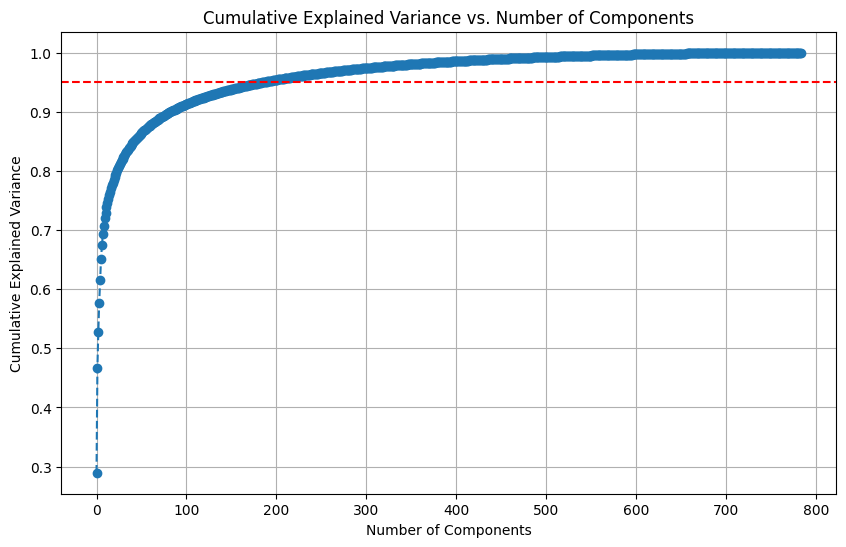

Number of components to maintain 95% variance: 186


In [22]:
## Apply PCA
pca = PCA()
pca.fit(X_train)

# Plot the cumulative variance ratio (cvr) vs number of PCs
evr = pca.explained_variance_ratio_ 
cvr = np.cumsum(evr)

plt.figure(figsize=(10, 6))
plt.plot(cvr, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Find the number of components that maintain 95% of the variance
n_components_95 = np.argmax(cvr >= 0.95) + 1
print(f'Number of components to maintain 95% variance: {n_components_95}')

# Return new training and test data 
pca = PCA(n_components = n_components_95)
X_train_pca, X_test_pca, X_kaggle_pca = pca.fit_transform(X_train), pca.transform(X_test), pca.transform(X_kaggle)

### 4.1.5 Model 3

Implement and fine-tune the hyperparameters for Model 3. 

In [23]:
# TODO: Implement model 3
knn = KNeighborsClassifier()

# Fit kNN
start_time = time.time()
knn.fit(X_train_pca, Y_train)
end_time = time.time()
print(f"Time to fit kNN: {end_time - start_time:.2f} seconds")

# Predict on test data
Y_pred_knn = knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_knn)
print(f"kNN Accuracy: {accuracy:.3f}")

#Time to fit kNN: 0.32 seconds
#Time to predict with kNN: 3.66 seconds
#kNN Accuracy:, 0.849

Time to fit kNN: 0.02 seconds
kNN Accuracy:, 0.857


In [24]:
# TODO: Fine-tune the hyperparameters for model 3

knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Number of neighbors to try (from 1 to 20)
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski distance (1 is Manhattan, 2 is Euclidean)
}

# Set up GridSearchCV
knn_cv = GridSearchCV(
    knn, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy', 
    verbose=2
)

# Fit knn model
knn_cv.fit(X_train_pca, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {knn_cv.best_params_}")
print(f"Best cross-validation accuracy: {knn_cv.best_score_:.2f}")

# Predict on test data
best_knn = knn_cv.best_estimator_
Y_pred_knn = best_knn.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_knn)
print(f"kNN Accuracy: {accuracy:.3f}")

# Best parameters: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
# Best cross-validation accuracy: 0.85
# kNN Accuracy:, 0.862

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  15.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.4s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.4s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=1, p=2, we

In [ ]:
"""Output from kNN hyperparameter tuning
Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  15.1s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=1, p=1, weights=uniform; total time=  14.8s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.4s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=1, p=1, weights=distance; total time=  15.4s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=1, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=1, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=  15.3s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=  15.3s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=  15.1s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=  15.3s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=  15.2s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=  14.9s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   1.1s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  15.4s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  15.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=3, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   1.3s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   1.1s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=3, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=4, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=4, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=4, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=4, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=4, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=4, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=4, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=4, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=4, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=4, p=1, weights=distance; total time=  15.2s
[CV] END ................n_neighbors=4, p=2, weights=uniform; total time=   1.2s
[CV] END ................n_neighbors=4, p=2, weights=uniform; total time=   1.1s
[CV] END ................n_neighbors=4, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=4, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=4, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=4, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=4, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=4, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=4, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=4, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  14.8s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  15.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  14.9s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=5, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=5, p=2, weights=distance; total time=   1.1s
[CV] END ...............n_neighbors=5, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=5, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=5, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=5, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=6, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=6, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=6, p=1, weights=uniform; total time=  15.5s
[CV] END ................n_neighbors=6, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=6, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=6, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=6, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=6, p=1, weights=distance; total time=  15.2s
[CV] END ...............n_neighbors=6, p=1, weights=distance; total time=  15.2s
[CV] END ...............n_neighbors=6, p=1, weights=distance; total time=  15.1s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=6, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=6, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=  15.1s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=7, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=7, p=1, weights=distance; total time=  15.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.9s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=7, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   0.9s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=7, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=8, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=8, p=1, weights=distance; total time=  15.1s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=8, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=8, p=2, weights=distance; total time=   1.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  15.0s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  14.9s
[CV] END ................n_neighbors=9, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=9, p=1, weights=distance; total time=  14.9s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.0s
[CV] END ................n_neighbors=9, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=9, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=10, p=1, weights=uniform; total time=  14.9s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=10, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=10, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=10, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=10, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=10, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=10, p=2, weights=uniform; total time=   0.9s
[CV] END ..............n_neighbors=10, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=10, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=10, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=10, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=10, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=  15.9s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=  15.3s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=  15.2s
[CV] END ...............n_neighbors=11, p=1, weights=uniform; total time=  15.4s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=11, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=11, p=2, weights=uniform; total time=   0.9s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=11, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=12, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=12, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=12, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=12, p=1, weights=uniform; total time=  15.2s
[CV] END ...............n_neighbors=12, p=1, weights=uniform; total time=  14.9s
[CV] END ..............n_neighbors=12, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=12, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=12, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=12, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=12, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=12, p=2, weights=uniform; total time=   1.0s
[CV] END ..............n_neighbors=12, p=2, weights=distance; total time=   1.1s
[CV] END ..............n_neighbors=12, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=12, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=12, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=12, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=  15.0s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=  15.3s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=13, p=1, weights=uniform; total time=  14.9s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=13, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=13, p=2, weights=uniform; total time=   1.0s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=13, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=14, p=1, weights=uniform; total time=  15.4s
[CV] END ...............n_neighbors=14, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=14, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=14, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=14, p=1, weights=uniform; total time=  15.1s
[CV] END ..............n_neighbors=14, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=14, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=14, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=14, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=14, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=14, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=14, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=14, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=14, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=14, p=2, weights=uniform; total time=   0.9s
[CV] END ..............n_neighbors=14, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=14, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=14, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=14, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=14, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=15, p=1, weights=uniform; total time=  15.0s
[CV] END ...............n_neighbors=15, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=15, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=15, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=15, p=1, weights=uniform; total time=  15.1s
[CV] END ..............n_neighbors=15, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=15, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=15, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=15, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=15, p=1, weights=distance; total time=  15.1s
[CV] END ...............n_neighbors=15, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=15, p=2, weights=uniform; total time=   1.1s
[CV] END ...............n_neighbors=15, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=15, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=15, p=2, weights=uniform; total time=   0.9s
[CV] END ..............n_neighbors=15, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=15, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=15, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=15, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=15, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=  15.0s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=16, p=1, weights=uniform; total time=  14.9s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=16, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=16, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=16, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=16, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=16, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=16, p=2, weights=uniform; total time=   0.9s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=16, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=17, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=17, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=17, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=17, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=17, p=1, weights=uniform; total time=  14.9s
[CV] END ..............n_neighbors=17, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=17, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=17, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=17, p=1, weights=distance; total time=  15.4s
[CV] END ..............n_neighbors=17, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=17, p=2, weights=uniform; total time=   1.1s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   0.9s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=17, p=2, weights=distance; total time=   1.1s
[CV] END ...............n_neighbors=18, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=18, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=18, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=18, p=1, weights=uniform; total time=  15.4s
[CV] END ...............n_neighbors=18, p=1, weights=uniform; total time=  15.0s
[CV] END ..............n_neighbors=18, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=18, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=18, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=18, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=18, p=1, weights=distance; total time=  14.9s
[CV] END ...............n_neighbors=18, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=18, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=18, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=18, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=18, p=2, weights=uniform; total time=   1.0s
[CV] END ..............n_neighbors=18, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=18, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=18, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=18, p=2, weights=distance; total time=   1.1s
[CV] END ..............n_neighbors=18, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=  15.1s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=  15.0s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=19, p=1, weights=uniform; total time=  14.8s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=  15.0s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=19, p=1, weights=distance; total time=  15.2s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   1.2s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   0.9s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   1.1s
[CV] END ...............n_neighbors=19, p=2, weights=uniform; total time=   1.2s
[CV] END ..............n_neighbors=19, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=19, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=19, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=19, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=19, p=2, weights=distance; total time=   1.0s
[CV] END ...............n_neighbors=20, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=20, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=20, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=20, p=1, weights=uniform; total time=  14.9s
[CV] END ...............n_neighbors=20, p=1, weights=uniform; total time=  15.1s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=  14.9s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=  15.1s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=  15.3s
[CV] END ..............n_neighbors=20, p=1, weights=distance; total time=  15.0s
[CV] END ...............n_neighbors=20, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=20, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=20, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=20, p=2, weights=uniform; total time=   1.0s
[CV] END ...............n_neighbors=20, p=2, weights=uniform; total time=   1.0s
[CV] END ..............n_neighbors=20, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=20, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=20, p=2, weights=distance; total time=   1.2s
[CV] END ..............n_neighbors=20, p=2, weights=distance; total time=   1.0s
[CV] END ..............n_neighbors=20, p=2, weights=distance; total time=   1.0s
Best parameters: {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best cross-validation accuracy: 0.85
kNN Accuracy:, 0.862
"""

Confusion Matrix:


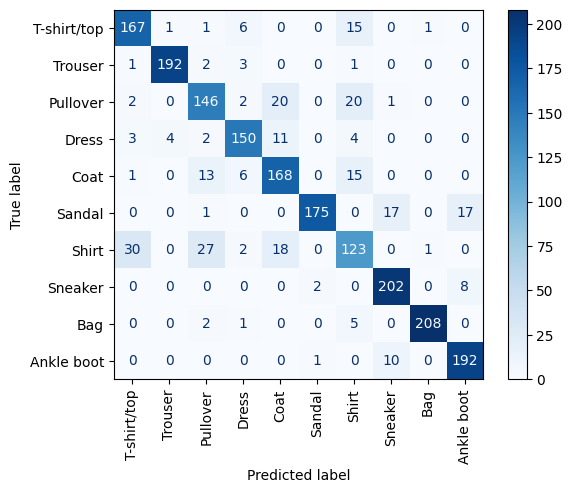

In [35]:
# Evaluation - kNN confusion matrix

cm = confusion_matrix(Y_test, Y_pred_knn)

print("kNN Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

### 4.1.6 Model 4

Implement and fine-tune the hyperparameters for Model 4. 

In [38]:
# TODO: Implement model 4 

svc = SVC()

# Fit SVM model
start_time = time.time()
svm_model = svc.fit(X_train_pca, Y_train)
end_time = time.time()
print(f"Time to fit SVM: {end_time - start_time:.2f} seconds")

# Predict on test data
Y_pred_svm = svm_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy:.3f}")

# Time to fit SVM: 26.72 seconds
# SVM Accuracy:, 0.894

Time to fit SVM: 26.72 seconds
SVM Accuracy:, 0.894


In [ ]:
# TODO: Fine-tune the hyperparameters for model 4

In [40]:
# Rough hyperparameter tuning

start_time = time.time()

svm = SVC(kernel='rbf')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1, 10]   # Regularisation parameter for SVM
}

# Set up GridSearchCV
svm_cv = GridSearchCV(
    svm, 
    param_grid=param_grid, 
    cv=2,
    scoring='accuracy', 
    verbose=2
)

# Fit knn model
svm_cv.fit(X_train_pca, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {svm_cv.best_params_}")
print(f"Best cross-validation accuracy: {svm_cv.best_score_:.2f}")

# Predict on test data
best_svm = svm_cv.best_estimator_
Y_pred_svm = best_svm.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy:.3f}")

end_time = time.time()
print(f"Cell completion time: {end_time - start_time:.2f} seconds")

# Best parameters: {'C': 10, 'gamma': 0.01}
# Best cross-validation accuracy: 0.89
# SVM Accuracy:, 0.903
# Cell completion time: 3889.14 seconds

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .................................C=0.01, gamma=0.01; total time= 1.2min
[CV] END .................................C=0.01, gamma=0.01; total time= 1.3min
[CV] END ..................................C=0.01, gamma=0.1; total time= 1.8min
[CV] END ..................................C=0.01, gamma=0.1; total time= 1.7min
[CV] END ....................................C=0.01, gamma=1; total time= 1.7min
[CV] END ....................................C=0.01, gamma=1; total time= 1.7min
[CV] END ...................................C=0.01, gamma=10; total time= 1.8min
[CV] END ...................................C=0.01, gamma=10; total time= 1.8min
[CV] END ..................................C=0.1, gamma=0.01; total time=  43.7s
[CV] END ..................................C=0.1, gamma=0.01; total time=  40.6s
[CV] END ...................................C=0.1, gamma=0.1; total time= 1.2min
[CV] END ...................................C=0.

In [48]:
# Finer hyperparameter tuning

start_time = time.time()

svm = SVC(kernel='rbf')

# Define the parameter grid
param_grid = {
    'C': np.arange(5, 16, 2),
    'gamma': np.arange(0.005, 0.016, 0.002)   # Regularisation parameter for SVM
}

# Set up GridSearchCV
svm_cv = GridSearchCV(
    svm, 
    param_grid=param_grid, 
    cv=2,
    scoring='accuracy', 
    verbose=2
)

# Fit knn model
svm_cv.fit(X_train_pca, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {svm_cv.best_params_}")
print(f"Best cross-validation accuracy: {svm_cv.best_score_:.2f}")

# Predict on test data
best_svm = svm_cv.best_estimator_
Y_pred_svm = best_svm.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy:.3f}")

end_time = time.time()
print(f"Cell completion time: {end_time - start_time:.2f} seconds")

#Best parameters: {'C': 7, 'gamma': 0.015}
#Best cross-validation accuracy: 0.89
#SVM Accuracy: 0.906
#Cell completion time: 1695.39 seconds

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ...................................C=5, gamma=0.005; total time=  24.4s
[CV] END ...................................C=5, gamma=0.005; total time=  22.6s
[CV] END ...................................C=5, gamma=0.007; total time=  23.3s
[CV] END ...................................C=5, gamma=0.007; total time=  22.3s
[CV] END ....................C=5, gamma=0.009000000000000001; total time=  23.8s
[CV] END ....................C=5, gamma=0.009000000000000001; total time=  22.7s
[CV] END ...................................C=5, gamma=0.011; total time=  24.2s
[CV] END ...................................C=5, gamma=0.011; total time=  23.6s
[CV] END ....................C=5, gamma=0.013000000000000001; total time=  24.7s
[CV] END ....................C=5, gamma=0.013000000000000001; total time=  23.5s
[CV] END ...................................C=5, gamma=0.015; total time=  25.4s
[CV] END ...................................C=5,

In [50]:
# CV hyperparameter tuning with more folds

start_time = time.time()

svm = SVC(kernel='rbf')

# Define the parameter grid
param_grid = {
    'C': [6.5, 7.0, 7.5],
    'gamma': [0.014, 0.015, 0.016]   # Regularisation parameter for SVM
}

# Set up GridSearchCV
svm_cv = GridSearchCV(
    svm, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy', 
    verbose=2
)

# Fit knn model
svm_cv.fit(X_train_pca, Y_train)

# Print the best parameters and the best score
print(f"Best parameters: {svm_cv.best_params_}")
print(f"Best cross-validation accuracy: {svm_cv.best_score_:.2f}")

# Predict on test data
best_svm = svm_cv.best_estimator_
Y_pred_svm = best_svm.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"SVM Accuracy: {accuracy:.3f}")

end_time = time.time()
print(f"Cell completion time: {end_time - start_time:.2f} seconds")

# Best parameters: {'C': 7.5, 'gamma': 0.016}
# Best cross-validation accuracy: 0.90
# SVM Accuracy: 0.906
# Cell completion time: 1221.22 seconds

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=6.5, gamma=0.014; total time=  27.8s
[CV] END .................................C=6.5, gamma=0.014; total time=  25.8s
[CV] END .................................C=6.5, gamma=0.014; total time=  25.7s
[CV] END .................................C=6.5, gamma=0.014; total time=  25.8s
[CV] END .................................C=6.5, gamma=0.014; total time=  25.7s
[CV] END .................................C=6.5, gamma=0.015; total time=  26.9s
[CV] END .................................C=6.5, gamma=0.015; total time=  26.4s
[CV] END .................................C=6.5, gamma=0.015; total time=  26.2s
[CV] END .................................C=6.5, gamma=0.015; total time=  26.4s
[CV] END .................................C=6.5, gamma=0.015; total time=  26.3s
[CV] END .................................C=6.5, gamma=0.016; total time=  27.3s
[CV] END .................................C=6.5, 

In [ ]:
##### Return and plot hyperparameters #####

# Get the results
results = svm_cv.cv_results_


In [65]:
# Fit model with best hyperparameters and perform CV to get final accuracy
svc = SVC(probability=False, kernel='rbf', C=7.5, gamma=0.016)

# Perform final cross-validation
start_time = time.time()
scores = cross_val_score(svc, X_train_pca, Y_train, cv=5)  # 5-fold cross-validation
end_time = time.time()
print(f"Time to perform cv: {end_time - start_time:.2f} seconds")
print(f"Mean SVM training accuracy: {np.mean(scores):.3f}")

# Fit SVM model
start_time = time.time()
svm_model = svc.fit(X_train_pca, Y_train)
end_time = time.time()
print(f"Time to fit SVM: {end_time - start_time:.2f} seconds")

# Predict on test data
Y_pred_svm = svm_model.predict(X_test_pca)

# Evaluate test performance
accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f"Mean SVM test accuracy: {accuracy:.3f}")

Time to perform cv: 141.12 seconds
Mean SVM training accuracy: 0.896
Time to fit SVM: 24.46 seconds
Mean SVM test accuracy: 0.906


SVM Confusion Matrix:


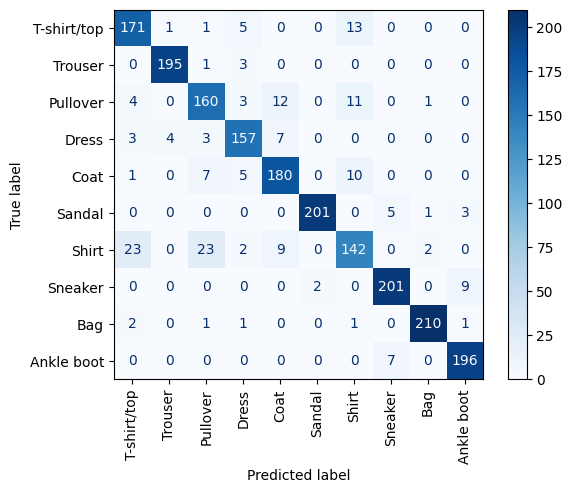

In [66]:
# Evaluation - SVM confusion matrix

cm = confusion_matrix(Y_test, Y_pred_svm)

print("SVM Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

### 4.1.7 Evaluation

Evaluate the best version of each model using appropriate classification performance metrics on the validation set and test on `test1.csv`. Ensure that the results are visualized using high-quality plots, figures, or tables to clearly demonstrate model performance.

In [18]:
# TODO: Evaluate each model

### 4.1.8 Comparison

Compare all classifiers with their optimized hyper-parameters, focusing on criteria such as classification performance, training time, and inference time. Visualization of these comparisons is required; use high-quality plots, figures, or tables to facilitate a clear understanding of the differences and strengths of each model.

In [19]:
# TODO: Compare performance of all models

### 4.1.9 The Best Classifier

Conclude the best classifier

In [1]:
# TODO: Train and test the classifier which has the best performance

### 4.1.10 Loading testing data

Load the testing data for prediction

In [6]:
# test2.csv includes 5000 samples used for label prediction. Test samples do not have labels.
data_test_df = pd.read_csv('./data/test2.csv', index_col=0)

In [7]:
# print out the first 5 rows of the test dataframe
data_test_df.head()

,v1,v2,v3,v4,v5,...,v780,v781,v782,v783,v784
id,,,,,,,,,,,
1,0,0,0,0,0,...,0,0,0,0,0
2,0,0,0,0,0,...,0,0,0,0,0
3,0,0,0,0,0,...,0,0,0,0,0
4,0,0,1,0,2,...,0,0,0,0,0
5,0,0,0,0,0,...,0,0,0,0,0


Use the your best classifier to make predictions for the test data. The predictions should be stored in a vector named `output`, with a length of 5000.

In [23]:
# TODO: Use your best classifier to make predictions on unseen data. The output of this code must be a vector named 'output' of length 5000

Save your prediction vector as a `test_output.csv` file, which contains two columns: `id` and `label`. Please refer to the `example_output.csv` for the structure of this output file. 

In [ ]:
output_df = pd.DataFrame(output, columns = ['label'])
output_df.to_csv('./test_output.csv', sep=",", float_format='%d',index_label="id")

## 4.2 Report

The report must be structured into the following key sections:

1. **Introduction**: Provide a comprehensive overview of the dataset, outline the methods chosen, and summarize the key findings and results.
2. **Methodology**: Describe pre-processing techniques and ML algorithms employed in this assignment. Include a discussion of the theoretical principles underlying each method and explain the rationale behind your choices.
3. **Result and Discussion**: Detail the experimental settings (e.g., implementation strategies, hyperparameter finetuning strategies, etc.). Present the results obtained from the selected algorithms and discuss their implications. Compare the performance of all models, considering factors such as accuracy, model complexity, training time, and inference time. Employ high-quality plots, figures, and tables to visually support and enhance the discussion of these results.
4. **Conclusion**: Summarize your main findings, mention any limitations methods and results and suggest potential directions for future works.
5. **References**: include the references cited in your report in a consistent format.

##### Important Notes

- The maximum length of the main report is 8 pages (excluding appendix and references).

-  You must include an appendix that clearly provides the instructions on how to setup the environment to run your code, especialy the installation guide and version of any external packages and
libraries used for implementation. In addition, you should include the hardware configurations used for the coding environment.

- The report must be in PDF format. Make sure the report is well-structured, easy to read, and that it presents your findings in a logical and organized way.


# 5. Submission Guidelines

## 5.1 Group Registration

For this assignment, you can work in groups of TWO. Please register your group under *People → Group → A1.1-Group* or *People → Group → A1.2-Group* on Canvas (We have created two separate group sets to accommodate the large number of students enrolled in this course).  

**The group registration should be done by Friday, Aug 30th, 2024.**

## 5.2 Submit your work

### 5.2.1 Submit to Kaggle

We use the Kaggle leaderboard for evaluating the results predicted by your models on unseen data. Follow the steps below to submit your work to the Kaggle leaderboard.

Kaggle link: [https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/)

1. Use the [Kaggle link](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) to join the competition, you need to create a Kaggle account if you don’t
have one.

2. Go to Team $\rightarrow$ Use your registered Group ID on Canvas as your team name (e.g., `A1.1-Group 1`). You can create a Kaggle team with up to 2 members.
   
3. Go to Description $\rightarrow$ Check the IMPORTANT NOTES for the assignment.
   
4. Submit Predictions $\rightarrow$ Follow the submission format and submit your prediction output file (`test_output.csv`).
   
5. Leaderboard $\rightarrow$ Check your accuracy score at the Leaderboard.

In summary, go to [Kaggle Page](https://www.kaggle.com/competitions/comp-4318-5318-2024-s-2-a-1/) $\rightarrow$ Join Competition $\rightarrow$ Create a Team $\rightarrow$ Submit Predictions $\rightarrow$ Submit file `test_output.csv`

IMPORTANT: This link is only available to the students of COMP4318/5318. All groups need to submit `test_output.csv` to Kaggle for marking puporse. Only 5 submissions are allowed per day
for Kaggle. Group ID on Canvas and Kaggle have to be identical otherwise the submission will not be marked for the Accuracy part.



### 5.2.2 Submit to Canvas

#### Proceed to the submission box on Canvas and submit 4 files separately as follows:

   1. A `.pdf` report file.

   2. An `.ipynb` code file: a Jupyter Notebook containing all your implementation. You can reuse the provided `.ipynb` template.
    
   3. A `.pdf` code file: this file is exported from the `.ipynb` file for checking plagiarism. 

   4. A `test_output.csv` file: contains the predictions made by your best classifier on unseen data. This file must be consistent with the one submitted on Kaggle.

There are two different submission boxes for the different group sets: *Assignment 1 - Submission (for A1.1-Group)* and *Assignment 1 - Submission (for A1.2-Group)*. Please ensure you submit to the correct box corresponding to your group ID.

##### File Naming Conventions 

The submission files should be named with your group ID and all student ID (SID) separated by the underscore (_). For example,

- a1_groupID_SID1_SID2.ipynb (code) 
  
- a1_groupID_SID1_SID2.pdf (pdf version of the code)
  
- a1_groupID_SID1_SID2_report.pdf (report)
  
where SID1 and SID2 are the SIDs of the two students.


##### Important Notes:
-	Only one group member needs to submit the assignment on behalf of the group.

-	Do NOT submit the dataset or zip files to Canvas. We will copy the `data` folder to the same directory with your `.ipynb` file to run your code. Please make sure your code is able to read the dataset from this folder.

-	Both the code and report will be checked for plagiarism.

##### Other guidelines

1.	Please refer to lecture notes, lab materials, and other course resources for different ML methods. 

2.	Please proceed your own way if we do not specify it in the assignment details.

3.	You can use any packages or code which have been introduced in lectures or tutorials. If you use any other packages or code snippets, please put the reference at the bottom of the code. Otherwise, it will be considered as plagiarism and the relevant section will not be marked.


## 5.3 Late Submission Penalties

##### A penalty of MINUS 5 percent (-5%) for each day after the due date. 
The maximum delay for assignment submission is 5 (five) days, after which assignment will not be accepted.

**You should upload your assignment at least half a day or one day prior to the submission deadline to avoid network congestion**.

Canvas and Kaggle may not be able to handle a large number of submission happening at the same time. If you submit your assignment at a time close to the deadline, a submission error may occur causing your submission to be considered late. Penalty will be applied to late submission regardless of issues. 

##### All files required for assignment 1 can be downloaded from Canvas $\rightarrow$ Assignments $\rightarrow$ Assignment 1 - Specification


## 5.4 Marking Rubric

Please refer to the rubric, which is available in the submission boxes on Canvas, for detailed marking scheme.

# 6. Inquiries after releasing the marking

**After Assignment 1 marks come out, please submit your inquiries about marking within the 1st week. All inquiries after that will be ignored.**

# 7. Academic honesty

Please read the University policy on Academic Honesty very carefully: 
https://sydney.edu.au/students/academic-integrity.html

Plagiarism (copying from another student, website or other sources), making your work available to another student to copy, engaging another person to complete the assignments instead of you (for payment or not) are all examples of academic dishonesty. Note that when there is copying between students, both students are penalised – the student who copies and the student who makes his/her work available for copying. The University penalties are severe and include: 

    * a permanent record of academic dishonesty on your student file, 
    * mark deduction, ranging from 0 for the assignment to Fail for the course
    * expulsion from the University and cancelling of your student visa. 

In addition, the Australian Government passed a new legislation last year (Prohibiting Academic Cheating Services Bill) that makes it a criminal offence to provide or advertise academic cheating services - the provision or undertaking of work for students which forms a substantial part of a student’s assessment task. Do not confuse legitimate co-operation and cheating!